In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications import MobileNet
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

#//////////////////////////////////////////////////////////////

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from shutil import copyfile
copyfile("/content/drive/MyDrive/Graduation-Project.rar" , "/content/Graduation-Project.rar")

'/content/Graduation-Project.rar'

In [ ]:
!pip install unrar
!unrar x "/content/Graduation-Project.rar"
#!unzip -q "/content/Graduation-Project.rar"

Streaming output truncated to the last 5000 lines.
Extracting  Graduation-Project/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Northern_Leaf_Blight/496510d6-dd7c-4dda-8379-d66a89b1b42f___RS_NLB 3793_180deg.JPG      85%  OK 
Extracting  Graduation-Project/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Northern_Leaf_Blight/4ef8e489-cafb-4d59-9fc9-00f8087f0cac___RS_NLB 4172.JPG      85%  OK 
Extracting  Graduation-Project/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Northern_Leaf_Blight/505ce513-98a9-4100-b7a0-f0767eb598c8___RS_NLB 4206_180deg.JPG      85%  OK 
Extracting  Graduation-Project/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Northern_Leaf_Blight/50f917f3-8a84-4379-adc3-ee0501043f4c___RS_NLB 3718.JPG      85% 

In [ ]:
import glob
dic = {}
#getting number of images of test with 10% percentage of data
for filename in glob.glob("/content/Graduation-Project/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/*"):
  dic[filename.split("/")[-1]]=0
  for filename2 in glob.glob(filename+"/*.jpg"):
    dic[filename.split("/")[-1]]+=1
  for filename2 in glob.glob(filename+"/*.JPG"):
    dic[filename.split("/")[-1]]+=1  
for filename in glob.glob("/content/Graduation-Project/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/*"):
  for filename2 in glob.glob(filename+"/*.jpg"):
    dic[filename.split("/")[-1]]+=1
  for filename2 in glob.glob(filename+"/*.JPG"):
    dic[filename.split("/")[-1]]+=1
  dic[filename.split("/")[-1]]=int(dic[filename.split("/")[-1]]*0.1) 
dic          

{'Apple___Apple_scab': 252,
 'Apple___Black_rot': 248,
 'Apple___Cedar_apple_rust': 220,
 'Apple___healthy': 251,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 205,
 'Corn_(maize)___Common_rust_': 238,
 'Corn_(maize)___Northern_Leaf_Blight': 238,
 'Corn_(maize)___healthy': 232,
 'Tomato___Bacterial_spot': 212,
 'Tomato___Early_blight': 240,
 'Tomato___Late_blight': 231,
 'Tomato___Leaf_Mold': 235,
 'Tomato___Septoria_leaf_spot': 218,
 'Tomato___Spider_mites Two-spotted_spider_mite': 217,
 'Tomato___Target_Spot': 228,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 245,
 'Tomato___Tomato_mosaic_virus': 223,
 'Tomato___healthy': 240}

In [ ]:
import os
os.makedirs("/content/Graduation-Project/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/_test", exist_ok=True)
for i in dic:
  os.makedirs("/content/Graduation-Project/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/_test/"+i, exist_ok=True)

In [ ]:
import shutil
for filename in glob.glob("/content/Graduation-Project/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/*"):
  count=0
  for filename2 in glob.glob(filename+"/*.JPG"):
    shutil.move(filename2, filename.replace("train","_test",1))
    count+=1
    if count %10==0:
      print(count)
    if count >= dic[filename.split("/")[-1]] :
      break

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
10
20
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
23

In [ ]:
train_path = '/content/Graduation-Project/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/Graduation-Project/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_path = '/content/Graduation-Project/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/_test'


In [ ]:
# Pre-processing data with parameters.
train_datagen=ImageDataGenerator(featurewise_center=True,
                             featurewise_std_normalization=True,horizontal_flip=True, vertical_flip=True)#,preprocessing_function=keras.applications.mobilenet.preprocess_input)

test_datagen=ImageDataGenerator(featurewise_center=True,
                             featurewise_std_normalization=True)#,preprocessing_function=keras.applications.mobilenet.preprocess_input)


In [ ]:
mean =[0.4527, 0.4789, 0.4178]# mean of RED GREEN BLUE CHANNELS )
std  =[0.2047, 0.1911, 0.2165]# STD of RED GREEN BLUE CHANNELS
train_datagen.std =sum([element * 255 for element in std]) / len(std)
train_datagen.mean=[element * 255 for element in mean]
test_datagen.std  =sum([element * 255 for element in std]) / len(std)
test_datagen.mean =[element * 255 for element in mean]

In [ ]:
train_batches = train_datagen.flow_from_directory(
        train_path, target_size=(224,224),batch_size=10)
valid_batches = test_datagen.flow_from_directory(
        valid_path, target_size=(224,224),batch_size=10)
test_batches = test_datagen.flow_from_directory(
        test_path, target_size=(224,224),batch_size=10,shuffle=False)

Found 29463 images belonging to 18 classes.
Found 8357 images belonging to 18 classes.
Found 3969 images belonging to 18 classes.


In [ ]:
mobile = keras.applications.mobilenet.MobileNet()

mobile.summary()

x = mobile.layers[-6].output
predictions = Dense(18,activation='softmax')(x)
model = Model(inputs = mobile.input , outputs=predictions)
# fine tunning 
for layer in model.layers[:-23]:
    layer.trainable = False
   

17227776/17225924 [==============================] - 2s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________

In [ ]:
#Optimizer بيحسن الaccuracy
model.compile(Adam(lr=0.0001), loss = 'categorical_crossentropy' , metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from  tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_callback_acc = ModelCheckpoint('MobilNetModel_acc.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
checkpoint_callback_loss = ModelCheckpoint('MobilNetModel_loss.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
train=model.fit(train_batches, steps_per_epoch = train_batches.samples//train_batches.batch_size, 
          validation_data = valid_batches, 
          validation_steps = valid_batches.samples//valid_batches.batch_size, epochs = 15 , verbose = 1,callbacks=[checkpoint_callback_acc,checkpoint_callback_loss])
#model.save("/content/MobilNetModel.h5")

Epoch 1/15
2946/2946 [==============================] - 202s 58ms/step - loss: 0.3001 - accuracy: 0.9085 - val_loss: 0.0956 - val_accuracy: 0.9654

Epoch 00001: val_accuracy improved from -inf to 0.96539, saving model to MobilNetModel_acc.h5

Epoch 00001: val_loss improved from inf to 0.09557, saving model to MobilNetModel_loss.h5
Epoch 2/15
2946/2946 [==============================] - 167s 57ms/step - loss: 0.1043 - accuracy: 0.9668 - val_loss: 0.0705 - val_accuracy: 0.9756

Epoch 00002: val_accuracy improved from 0.96539 to 0.97557, saving model to MobilNetModel_acc.h5

Epoch 00002: val_loss improved from 0.09557 to 0.07051, saving model to MobilNetModel_loss.h5
Epoch 3/15
2946/2946 [==============================] - 165s 56ms/step - loss: 0.0707 - accuracy: 0.9764 - val_loss: 0.0574 - val_accuracy: 0.9818

Epoch 00003: val_accuracy improved from 0.97557 to 0.98180, saving model to MobilNetModel_acc.h5

Epoch 00003: val_loss improved from 0.07051 to 0.05741, saving model to MobilNetM

In [ ]:
#model.save("/content/MobilNetModel")

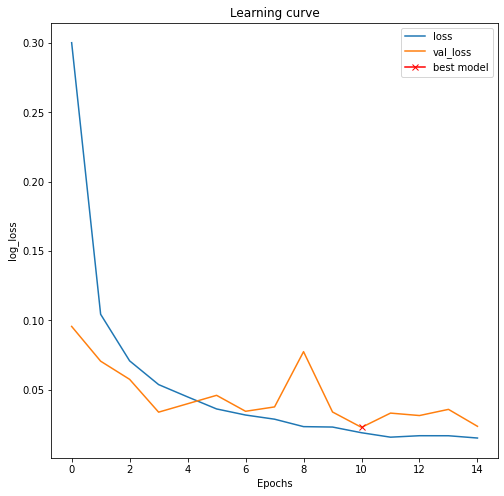

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(train.history["loss"], label="loss")
plt.plot(train.history["val_loss"], label="val_loss")
plt.plot( np.argmin(train.history["val_loss"]), np.min(train.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();#near to blanced data

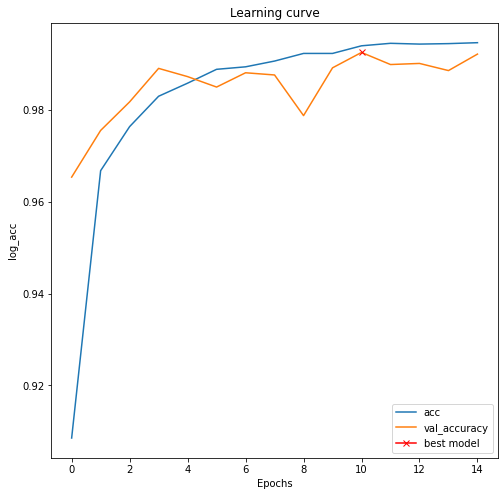

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(train.history["accuracy"], label="acc")
plt.plot(train.history["val_accuracy"], label="val_accuracy")
plt.plot( np.argmax(train.history["val_accuracy"]), np.max(train.history["val_accuracy"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_acc")
plt.legend();#near to blanced data

In [ ]:
#resperpi
from tensorflow.keras.models import load_model
model = load_model("/content/MobilNetModel_acc.h5")
Classes = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold' , 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
def prepare_image(file_pa):
    img_path = file_pa 
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    mean =[0.4525, 0.4787, 0.4177]# mean of RED GREEN BLUE CHANNELS )
    std  =[0.2047, 0.1911, 0.2165]# STD of RED GREEN BLUE CHANNELS
    std_=sum([element * 255 for element in std]) / len(std)
    img_array[:,:,0] = (img_array[:,:,0] - 255*mean[0]) / std_
    img_array[:,:,1] = (img_array[:,:,1] - 255*mean[1]) / std_
    img_array[:,:,2] = (img_array[:,:,2] - 255*mean[2]) / std_
    img_array_expanded_dims = np.expand_dims(img_array,axis=0)
    return img_array_expanded_dims
preprocessed_image = prepare_image('/content/Graduation-Project/archive/test/test/AppleCedarRust1.JPG')
result =list( model.predict(preprocessed_image)[0]).index(max(list( model.predict(preprocessed_image)[0])))
print(Classes[result])

Apple___Cedar_apple_rust


In [ ]:
"""probabilities = model.predict_generator(test_generator)
pre=[]
for i in probabilities:
    listss=list(i)
    max_value = max(listss)
    max_index = listss.index(max_value)
    pre.append(max_index)
y_true=test_generator.classes"""
#TEST
pre=[]
true=[]
for filename in glob.glob("/content/Graduation-Project/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/_test/*"):
  for filename2 in glob.glob(filename+"/*.jpg"):
    pre.append(list( model.predict(prepare_image(filename2))[0]).index(max(list( model.predict(prepare_image(filename2))[0]))))#int(model.predict_classes([prepare_image(filename2)])))
    true.append(test_batches.class_indices[filename.split("/")[-1]])          
  for filename2 in glob.glob(filename+"/*.JPG"):
    pre.append(list( model.predict(prepare_image(filename2))[0]).index(max(list( model.predict(prepare_image(filename2))[0]))))
    true.append(test_batches.class_indices[filename.split("/")[-1]])
#print(pre)
#print(y_true)
from sklearn.metrics import classification_report
print(classification_report(true,pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00       248
           2       1.00      1.00      1.00       220
           3       1.00      1.00      1.00       251
           4       1.00      0.99      0.99       205
           5       1.00      1.00      1.00       238
           6       0.99      1.00      0.99       238
           7       1.00      1.00      1.00        28
           8       1.00      1.00      1.00       212
           9       1.00      1.00      1.00       240
          10       0.99      1.00      1.00       231
          11       1.00      1.00      1.00       235
          12       0.99      0.99      0.99       218
          13       0.99      0.99      0.99       217
          14       0.98      0.98      0.98       228
          15       1.00      1.00      1.00       245
          16       1.00      1.00      1.00       223
          17       1.00    

In [ ]:
csv_names_test=[]
for filename in glob.glob("/content/Graduation-Project/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/_test/*"):
  for filename2 in glob.glob(filename+"/*.jpg"):
    csv_names_test.append(filename2.split("/")[-1])  

  for filename2 in glob.glob(filename+"/*.JPG"):
    csv_names_test.append(filename2.split("/")[-1])  
print(csv_names_test) 

['RS_Rust 2627_flipLR.JPG', 'RS_Rust 1763.JPG', 'RS_Rust 2499_flipLR.JPG', 'RS_Rust 2452.JPG', 'RS_Rust 1610_flipLR.JPG', 'RS_Rust 2110.JPG', 'RS_Rust 2162.JPG', 'RS_Rust 1778.JPG', 'RS_Rust 2720_flipLR.JPG', 'RS_Rust 1979.JPG', 'RS_Rust 2640_flipLR.JPG', 'RS_Rust 1785.JPG', 'RS_Rust 2466.JPG', 'RS_Rust 1903.JPG', 'RS_Rust 1579_flipLR.JPG', 'RS_Rust 2276_flipLR.JPG', 'RS_Rust 1917.JPG', 'RS_Rust 1680.JPG', 'RS_Rust 1854_flipLR.JPG', 'RS_Rust 2091_flipLR.JPG', 'RS_Rust 2324.JPG', 'RS_Rust 2395.JPG', 'RS_Rust 1894_flipLR.JPG', 'RS_Rust 2648.JPG', 'RS_Rust 2351.JPG', 'RS_Rust 2017.JPG', 'RS_Rust 2165_flipLR.JPG', 'RS_Rust 2702_flipLR.JPG', 'RS_Rust 1640.JPG', 'RS_Rust 1956_flipLR.JPG', 'RS_Rust 1971_flipLR.JPG', 'RS_Rust 1908.JPG', 'RS_Rust 1930_flipLR.JPG', 'RS_Rust 2524.JPG', 'RS_Rust 1731.JPG', 'RS_Rust 2377.JPG', 'RS_Rust 2433.JPG', 'RS_Rust 1877.JPG', 'RS_Rust 2193_flipLR.JPG', 'RS_Rust 1654.JPG', 'RS_Rust 2295_flipLR.JPG', 'RS_Rust 2006.JPG', 'RS_Rust 2590_flipLR.JPG', 'RS_Rust 2217

In [ ]:
model.save("MobilNetModel_acc_99_new")

INFO:tensorflow:Assets written to: MobilNetModel_acc_99_new/assets
